# Event Study
An event study is a statistical method to assess the impact of a particular event on the value of a stock. In this example we will evalute what happens to stocks whose price fall below 30$

In [1]:
import yfinance as yf

In [2]:
%pylab inline --no-import-all
import alphalens
import pandas as pd
import numpy as np
import datetime

Populating the interactive namespace from numpy and matplotlib


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
pan = yf.download("GOOGL AAPL AMD TSLA NFLX TXN AMAT AMZN INTC NVDA ADBE CSCO V IBM QCOM MSFT XLNX HPQ VZ T", start="2011-05-20", end="2021-05-20")
# tech = data[["Open"]]

[*********************100%***********************]  20 of 20 completed


In [21]:
today_price = pan['Open']
today_price

,AAPL,ADBE,AMZN,CSCO,FB,GOOGL,HPQ,IBM,INTC,MSFT,NFLX,NVDA,PYPL,QCOM,T,TSLA,UBER,V,VZ,XLNX
Date,,,,,,,,,,,,,,,,,,,,
2011-05-16,12.114286,35.130001,200.539993,16.820000,NaN,263.418427,18.256130,169.809998,23.320000,24.959999,35.142857,18.209999,NaN,57.180000,31.320000,5.598000,NaN,19.787500,37.259998,35.580002
2011-05-17,11.857143,34.389999,191.820007,16.500000,NaN,257.972961,17.061762,167.850006,23.370001,24.400000,33.571430,17.639999,NaN,56.380001,31.020000,5.400000,NaN,19.950001,36.900002,35.230000
2011-05-18,12.016786,34.599998,194.130005,16.639999,NaN,265.035034,16.634876,170.100006,23.600000,24.530001,33.914288,17.700001,NaN,56.230000,31.160000,5.220000,NaN,20.107500,37.169998,35.340000
2011-05-19,12.217143,34.980000,198.330002,16.750000,NaN,266.631622,16.544050,170.860001,23.320000,24.850000,34.785713,18.180000,NaN,56.619999,31.280001,5.406000,NaN,20.032499,37.189999,36.299999
2011-05-20,12.127143,35.459999,197.949997,16.680000,NaN,266.166168,16.353315,170.399994,23.459999,24.719999,34.511429,17.740000,NaN,57.220001,31.350000,5.652000,NaN,19.834999,37.250000,36.009998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-10,129.410004,487.540009,3282.320068,53.970001,314.350006,2328.139893,35.889999,145.800003,57.150002,250.869995,502.000000,591.489990,252.014999,136.020004,32.330002,664.900024,47.709999,231.600006,59.080002,123.129997
2021-05-11,123.500000,471.029999,3136.280029,53.099998,300.750000,2243.070068,34.520000,144.990005,55.049999,244.550003,479.750000,553.000000,235.000000,125.250000,32.490002,599.239990,44.500000,223.740005,59.790001,115.980003
2021-05-12,123.400002,477.190002,3185.000000,52.180000,301.130005,2226.189941,33.250000,143.839996,54.389999,242.169998,486.829987,560.380005,240.589005,126.029999,32.150002,602.489990,45.900002,223.630005,58.250000,118.290001


In [22]:
today_price = pan['Open']
yesterday_price = today_price.shift(1)
events = today_price[ (today_price < 30.0) & (yesterday_price >= 30) ]
events = events.stack()
events.index = events.index.set_names(['date', 'asset'])
events = events.astype(float)
events

date        asset
2011-06-23  ADBE     29.670000
2011-06-27  ADBE     29.840000
2011-07-15  ADBE     29.430000
2011-07-26  T        29.910000
2011-08-02  T        29.459999
                       ...    
2021-03-16  T        29.750000
2021-03-22  T        29.780001
2021-03-24  HPQ      29.730000
2021-04-13  T        29.860001
2021-04-20  T        29.969999
Length: 109, dtype: float64

In [23]:
pricing = pan['Open'].iloc[1:]

In [24]:
# we don't want any filtering to be done

filter_zscore = None 

In [25]:
# We want to have only one  bin/quantile. So we can either use quantiles=1 or bins=1

quantiles = None
bins      = 1

# Beware that in pandas versions below 0.20.0 there were few bugs in panda.qcut and pandas.cut
# that resulted in ValueError exception to be thrown when identical values were present in the
# dataframe and 1 quantile/bin was selected.
# As a workaroung use the bins custom range option that include all your values. E.g.

quantiles = None
bins      = [-1000000,1000000]

In [26]:
# You don't have to directly set 'long_short' option when running alphalens.tears.create_event_study_tear_sheet
# But in case you are making use of other Alphalens functions make sure to set 'long_short=False'
# if you set 'long_short=True' Alphalens will perform forward return demeaning and that makes sense only
# in a dollar neutral portfolio. With an event style signal you cannot usually create a dollar neutral
# long/short portfolio

long_short = False

## Long signal

In [27]:
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(events, 
                                                                   pricing, 
                                                                   quantiles=None,
                                                                   bins=1,
                                                                   periods=(1, 2, 3, 4, 5, 6, 10),
                                                                   filter_zscore=None)

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,27.389999,29.99,29.541525,0.497915,109,100.0


<Figure size 432x288 with 0 Axes>

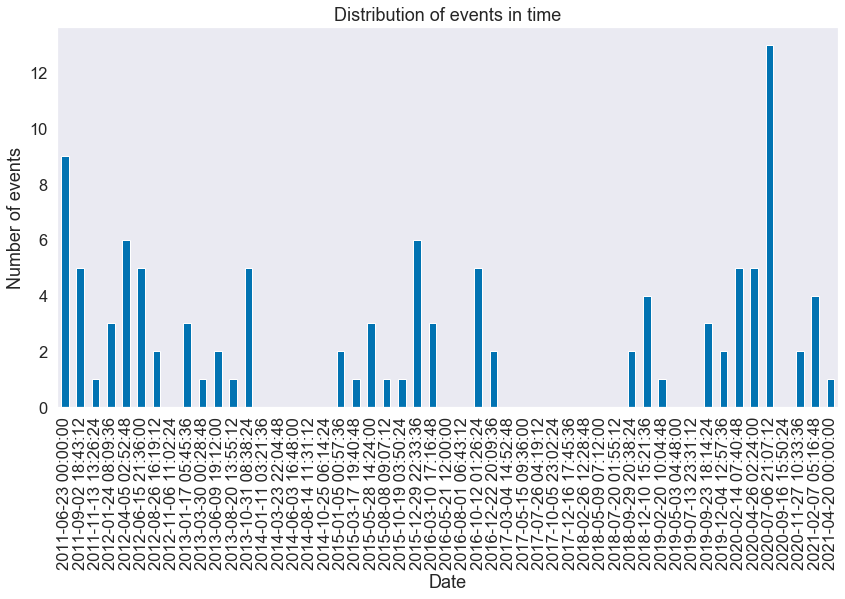

<Figure size 432x288 with 0 Axes>

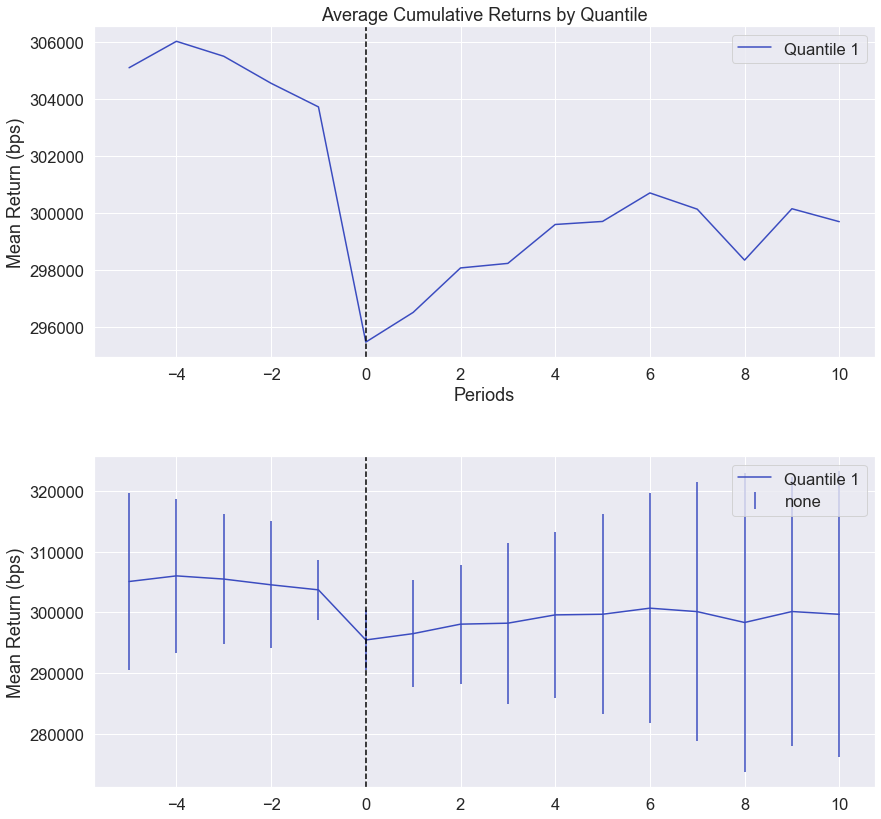

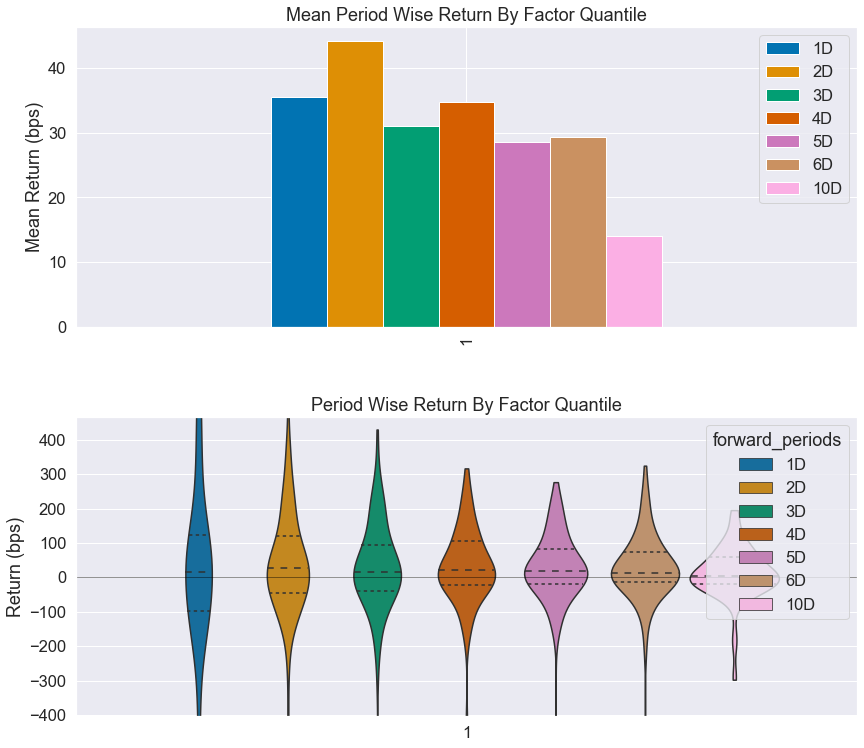

In [28]:
alphalens.tears.create_event_study_tear_sheet(factor_data, pricing, avgretplot=(5, 10))


## If we wanted to analyze the performance of short signal, we only had to switch from positive to negative event values

In [29]:
events = -events

In [30]:
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(events, 
                                                                   pricing, 
                                                                   quantiles=None,
                                                                   bins=1,
                                                                   periods=(1, 2, 3, 4, 5, 6, 10),
                                                                   filter_zscore=None)

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-29.99,-27.389999,-29.541525,0.497915,109,100.0


<Figure size 432x288 with 0 Axes>

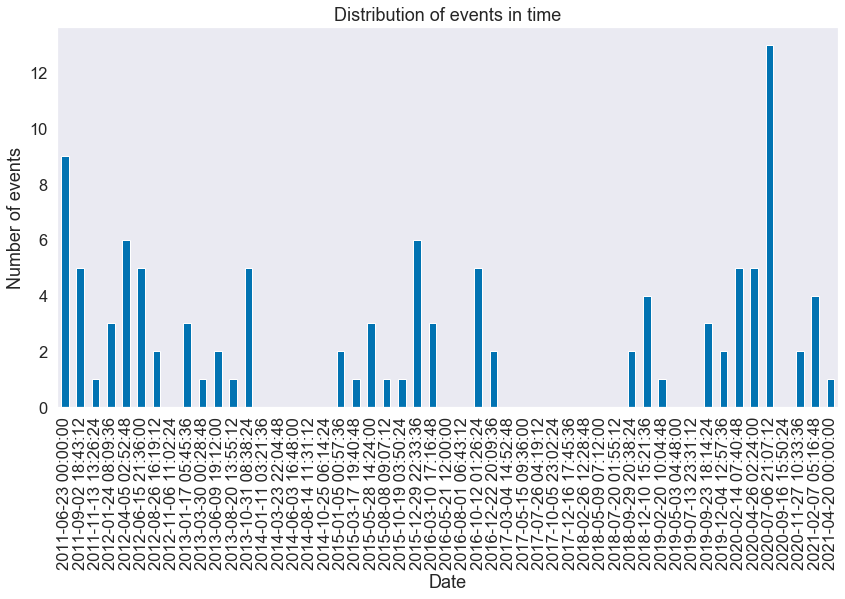

<Figure size 432x288 with 0 Axes>

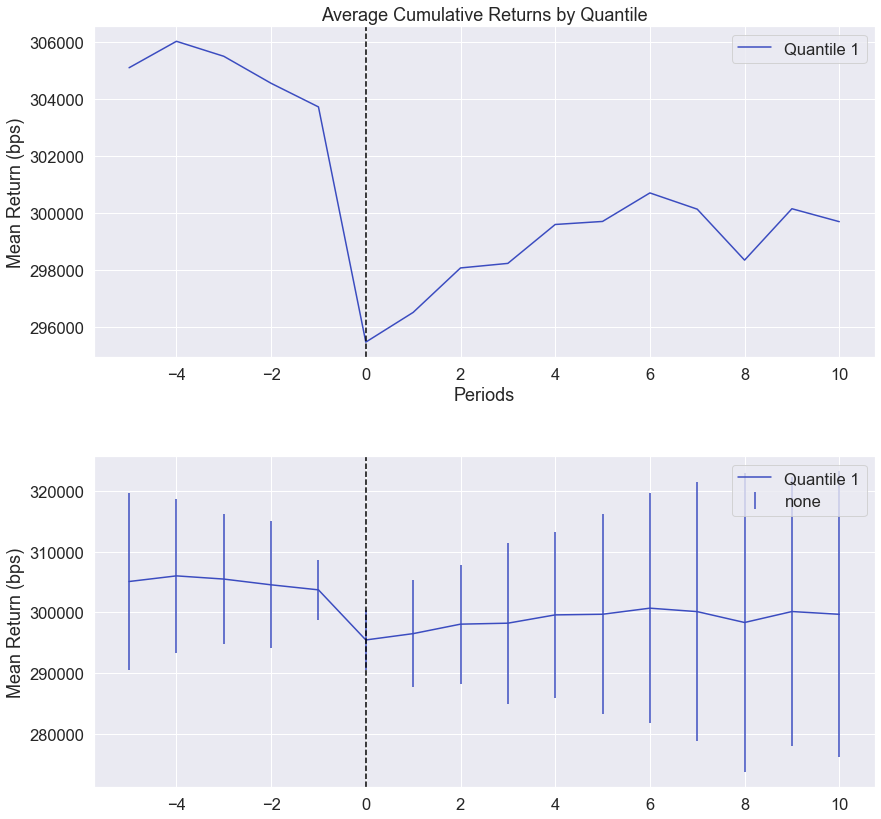

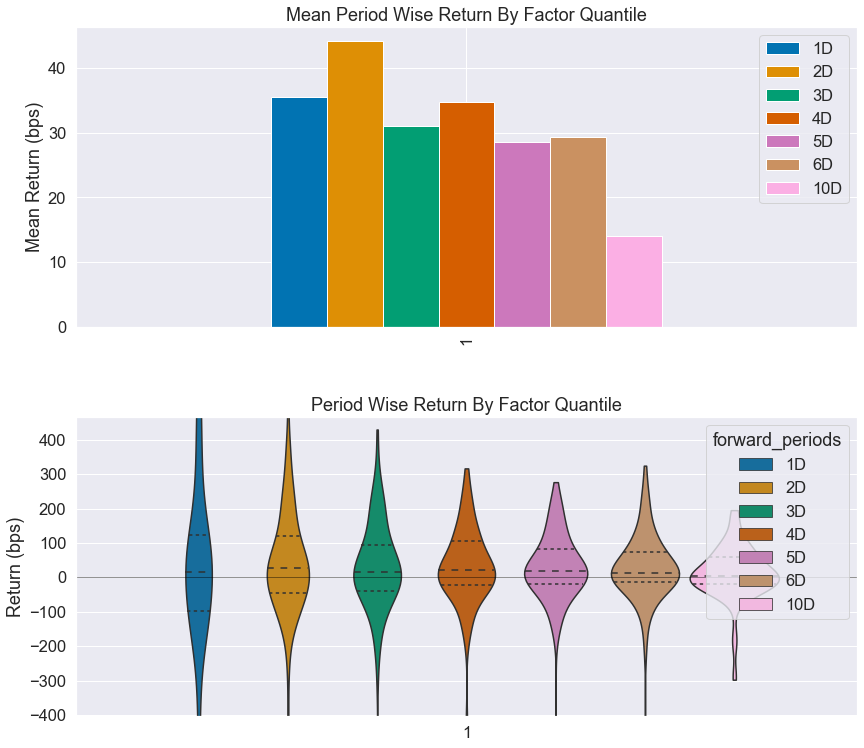

In [31]:
alphalens.tears.create_event_study_tear_sheet(factor_data, pricing, avgretplot=(5, 10))